___In this project we will be using the Breast Cancer Wisconsin(Diagnostic)data set from UCI Repository.We will be training a K-Nearest Neigbour (KNN) algorithm to predict whether a cell is Benign or Malignat.
Description Sample data available at https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)___

                                                                                     Md kamruzzaman Khan
                                                                                                10/02/20


 __Import libraries__

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [10]:
df=pd.read_csv('/Users/mk/Downloads/breastcancer.csv')

In [11]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [13]:
df['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [18]:
df['diagnosis']=df['diagnosis'].astype('category')

In [21]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [90]:
df=df.drop(['Unnamed: 32','diagnosid'], axis=1)
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

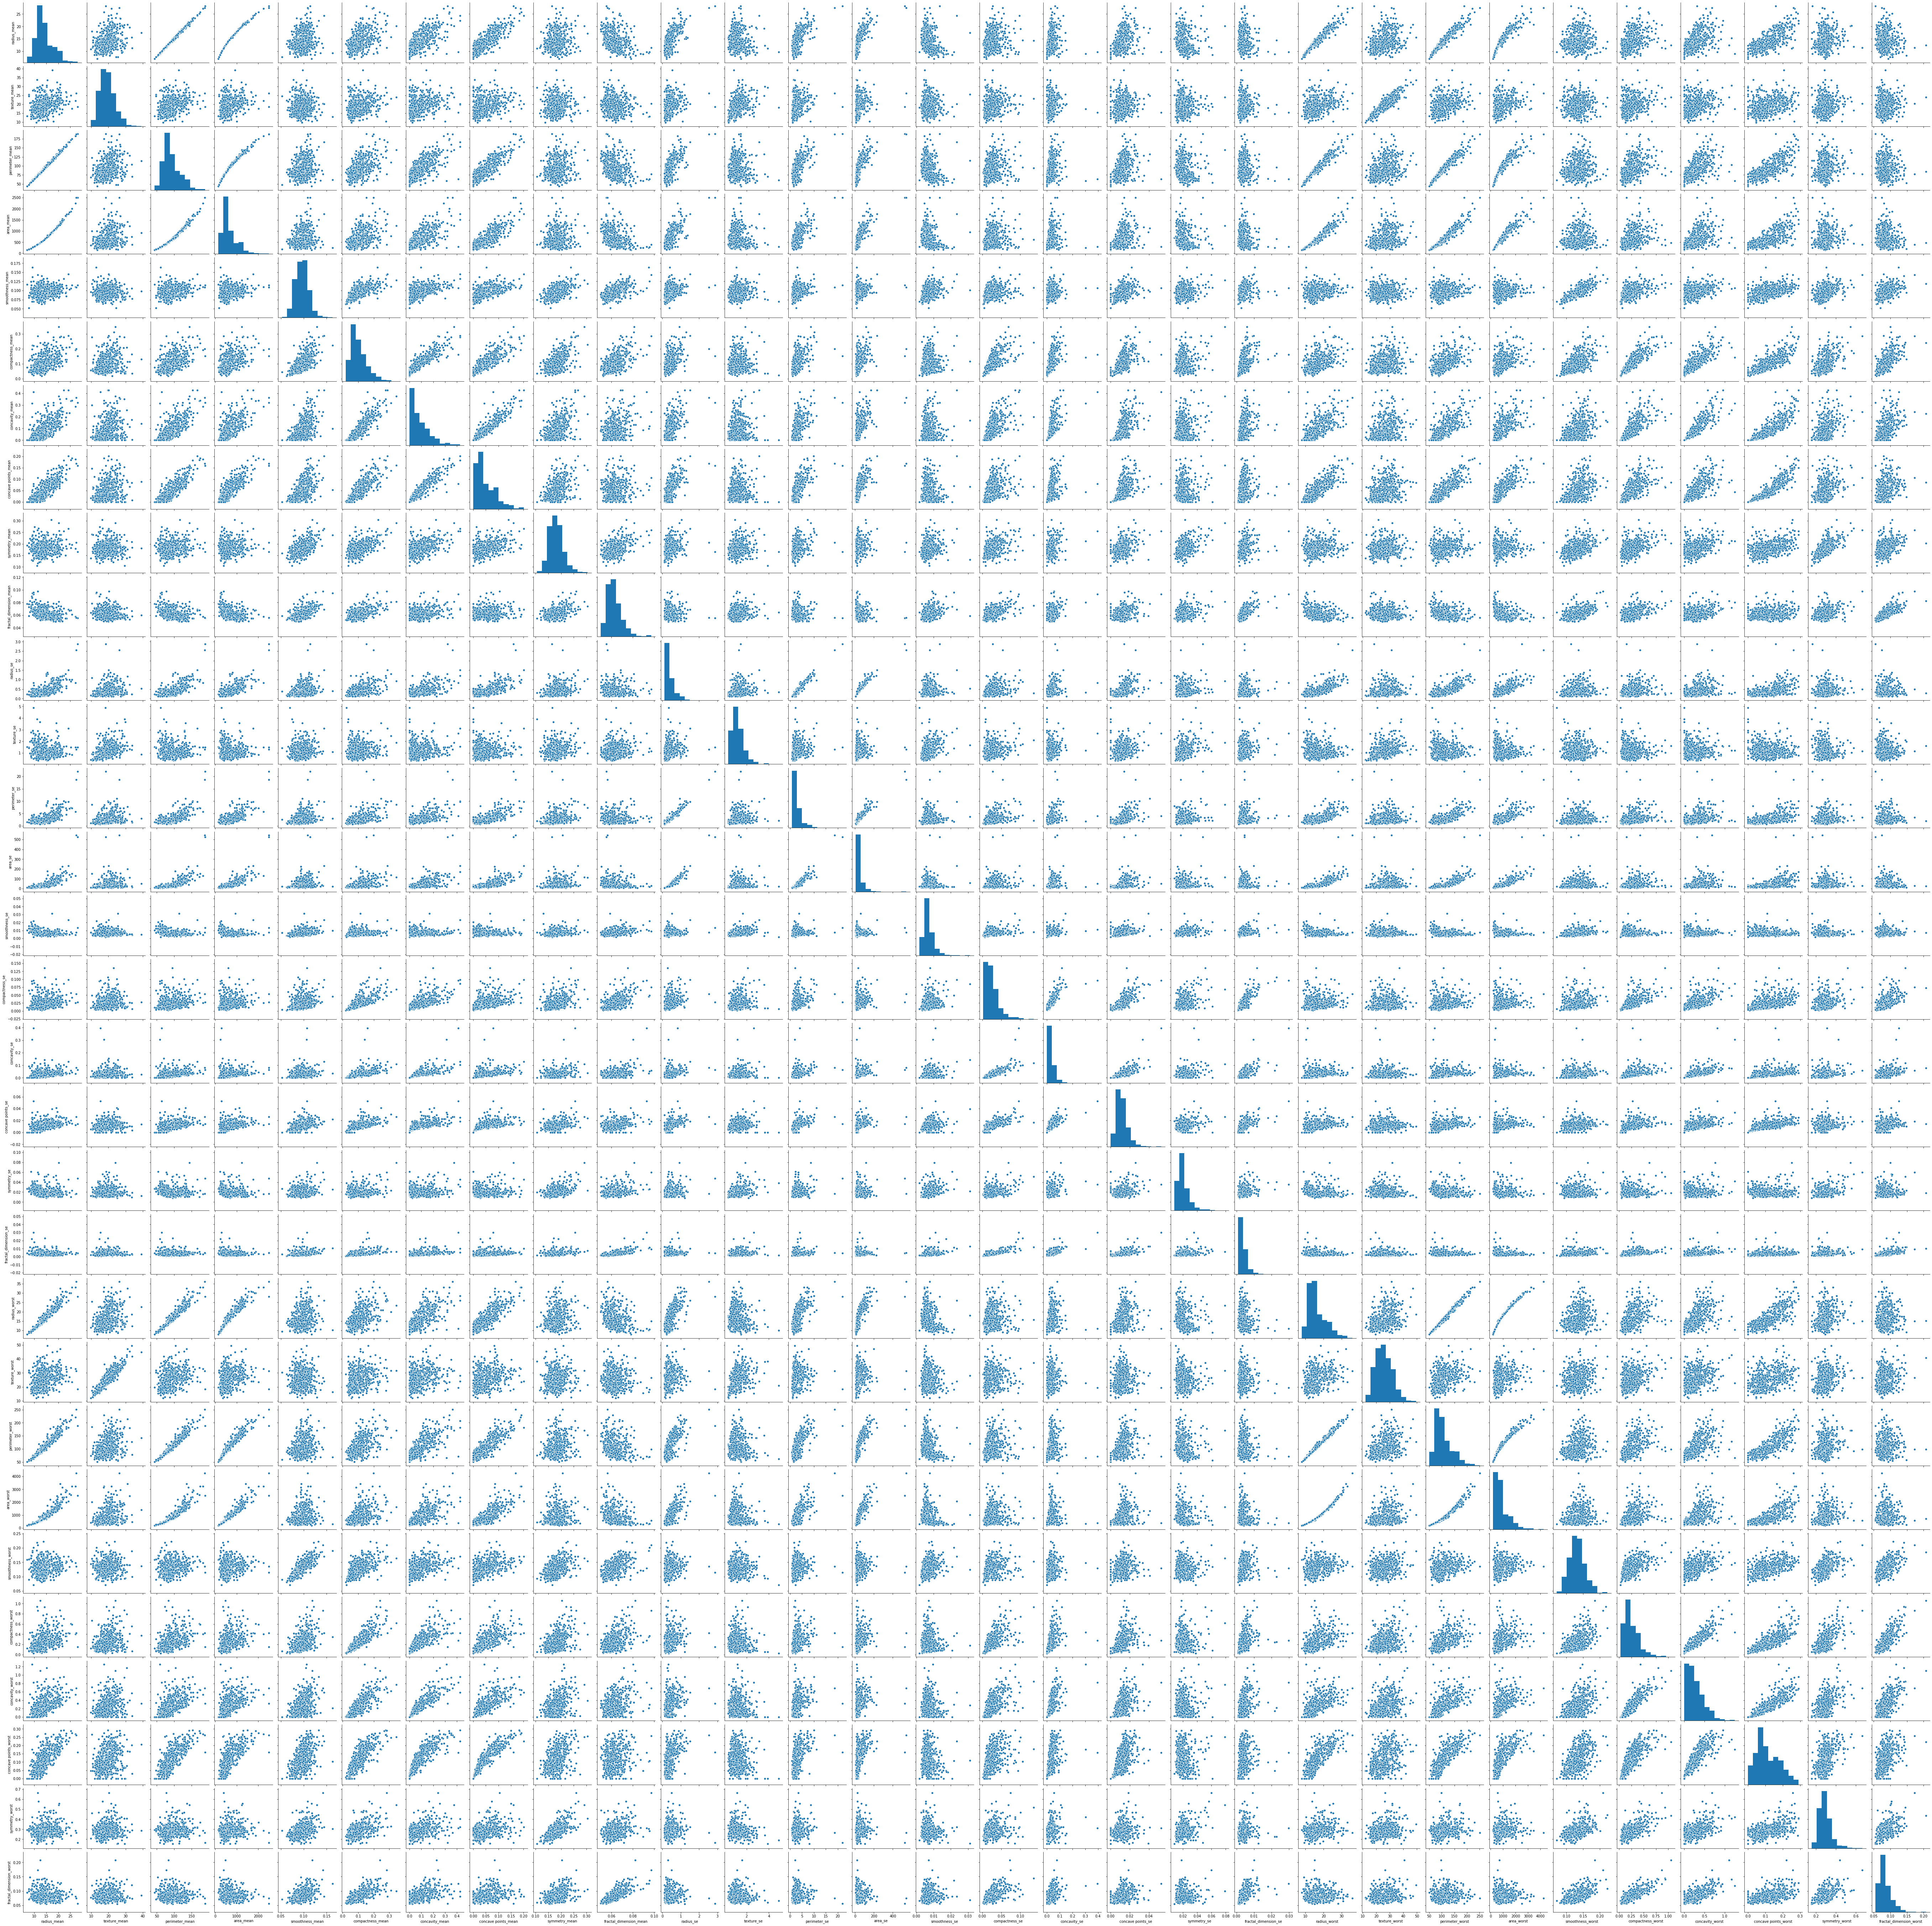

In [124]:
sns.pairplot(df)
plt.show()

In [91]:
X=df.drop(labels='diagnosis',axis=1)
Y=df['diagnosis']

In [92]:

X



radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     concavity_worst  concave points_worst  symmetry_worst  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [93]:
XScaled = X.apply(zscore)

In [95]:
XScaled.describe()

radius_mean  texture_mean  perimeter_mean     area_mean  \
count  5.690000e+02  5.690000e+02    5.690000e+02  5.690000e+02   
mean  -1.256562e-16  1.049736e-16   -1.272171e-16 -1.900452e-16   
std    1.000880e+00  1.000880e+00    1.000880e+00  1.000880e+00   
min   -2.029648e+00 -2.229249e+00   -1.984504e+00 -1.454443e+00   
25%   -6.893853e-01 -7.259631e-01   -6.919555e-01 -6.671955e-01   
50%   -2.150816e-01 -1.046362e-01   -2.359800e-01 -2.951869e-01   
75%    4.693926e-01  5.841756e-01    4.996769e-01  3.635073e-01   
max    3.971288e+00  4.651889e+00    3.976130e+00  5.250529e+00   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count     5.690000e+02      5.690000e+02    5.690000e+02         5.690000e+02   
mean      1.490704e-16      2.544342e-16   -1.338511e-16        -8.429110e-17   
std       1.000880e+00      1.000880e+00    1.000880e+00         1.000880e+00   
min      -3.112085e+00     -1.610136e+00   -1.114873e+00        -1.261820e+00   
25%      -7.109628e-01     -7.470860e-01   -7.437479e-01        -7.379438e-01   
50%      -3.489108e-02     -2.219405e-01   -3.422399e-01        -3.977212e-01   
75%       6.361990e-01      4.938569e-01    5.260619e-01         6.469351e-01   
max       4.770911e+00      4.568425e+00    4.243589e+00         3.927930e+00   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count   5.690000e+02            5.690000e+02  ...  5.690000e+02   
mean    2.081912e-16            5.408679e-16  ... -7.988142e-16   
std     1.000880e+00            1.000880e+00  ...  1.000880e+00   
min    -2.744117e+00           -1.819865e+00  ... -1.726901e+00   
25%    -7.032397e-01           -7.226392e-01  ... -6.749213e-01   
50%    -7.162650e-02           -1.782793e-01  ... -2.690395e-01   
75%     5.307792e-01            4.709834e-01  ...  5.220158e-01   
max     4.484751e+00            4.910919e+00  ...  4.094189e+00   

       texture_worst  perimeter_worst    area_worst  smoothness_worst  \
count   5.690000e+02     5.690000e+02  5.690000e+02      5.690000e+02   
mean   -1.834112e-17    -4.015534e-16 -2.848727e-17     -2.189227e-16   
std     1.000880e+00     1.000880e+00  1.000880e+00      1.000880e+00   
min    -2.223994e+00    -1.693361e+00 -1.222423e+00     -2.682695e+00   
25%    -7.486293e-01    -6.895783e-01 -6.421359e-01     -6.912304e-01   
50%    -4.351564e-02    -2.859802e-01 -3.411812e-01     -4.684277e-02   
75%     6.583411e-01     5.402790e-01  3.575891e-01      5.975448e-01   
max     3.885905e+00     4.287337e+00  5.930172e+00      3.955374e+00   

       compactness_worst  concavity_worst  concave points_worst  \
count       5.690000e+02     5.690000e+02          5.690000e+02   
mean       -2.579464e-16     1.143393e-16          2.829215e-16   
std         1.000880e+00     1.000880e+00          1.000880e+00   
min        -1.443878e+00    -1.305831e+00         -1.745063e+00   
25%        -6.810833e-01    -7.565142e-01         -7.563999e-01   
50%        -2.695009e-01    -2.182321e-01         -2.234689e-01   
75%         5.396688e-01     5.311411e-01          7.125100e-01   
max         5.112877e+00     4.700669e+00          2.685877e+00   

       symmetry_worst  fractal_dimension_worst  
count    5.690000e+02             5.690000e+02  
mean     1.670212e-16             2.321908e-16  
std      1.000880e+00             1.000880e+00  
min     -2.160960e+00            -1.601839e+00  
25%     -6.418637e-01            -6.919118e-01  
50%     -1.274095e-01            -2.164441e-01  
75%      4.501382e-01             4.507624e-01  
max      6.046041e+00             6.846856e+00  

[8 rows x 30 columns]

In [96]:
XScaled_df=pd.DataFrame(XScaled)

In [103]:
x_train,x_test,y_train,y_test= train_test_split(XScaled_df,y,test_size=.3,random_state=1)

In [100]:
KNN=KNeighborsClassifier(n_neighbors=5, weights='distance')

In [104]:
KNN.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [105]:
KNN_predict=KNN.predict(x_test)
KNN_predict

array(['B', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M',
       'B', 'B'], dtype=object)

In [106]:
KNN.score(x_test,y_test)

0.9532163742690059

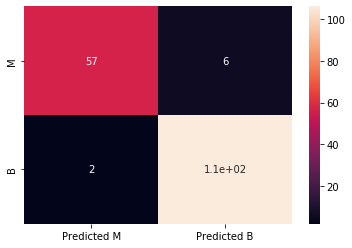

confusion Matrix


In [107]:
cm=metrics.confusion_matrix(y_test,KNN_predict, labels=['M','B'])
df_cm=pd.DataFrame(cm,index=[i for i in ['M','B']],
                           columns=[i for i in ['Predicted M','Predicted B']])
sns.heatmap(df_cm,annot=True)
plt.show()
print('confusion Matrix')

In [113]:
scores_1=[]

for i in range(1,50):
    KNN_2=KNeighborsClassifier(n_neighbors=i)
    score_2=cross_val_score(KNN_2,XScaled_df,y,cv=10)
    scores_1.append(score_2.mean())

In [114]:
 score_2

array([0.96491228, 0.92982456, 0.9122807 , 0.94736842, 0.96491228,
       0.98245614, 0.92982456, 0.98245614, 0.98245614, 0.94642857])

In [115]:
scores_1

[0.9507518796992482,
 0.9560463659147869,
 0.9647869674185465,
 0.9648182957393484,
 0.9666353383458647,
 0.9648496240601503,
 0.9683897243107771,
 0.9648809523809524,
 0.9648496240601503,
 0.9648809523809524,
 0.9683897243107769,
 0.9613408521303258,
 0.9666353383458647,
 0.9595864661654134,
 0.9613408521303256,
 0.9613095238095237,
 0.963095238095238,
 0.9542919799498746,
 0.9542919799498746,
 0.9542919799498746,
 0.9560463659147869,
 0.9542919799498746,
 0.9542919799498746,
 0.9525375939849624,
 0.9560776942355889,
 0.9543233082706767,
 0.9560776942355889,
 0.9525375939849623,
 0.9560776942355889,
 0.9525375939849623,
 0.9543233082706765,
 0.9525375939849623,
 0.9543233082706765,
 0.9543233082706765,
 0.9543233082706765,
 0.9543233082706765,
 0.9543233082706765,
 0.9543233082706765,
 0.9543233082706765,
 0.9543233082706765,
 0.9525375939849623,
 0.9525375939849623,
 0.9525375939849623,
 0.9525375939849623,
 0.9543233082706765,
 0.9525375939849623,
 0.9525375939849623,
 0.95253759398

Text(0, 0.5, 'Accuracy')

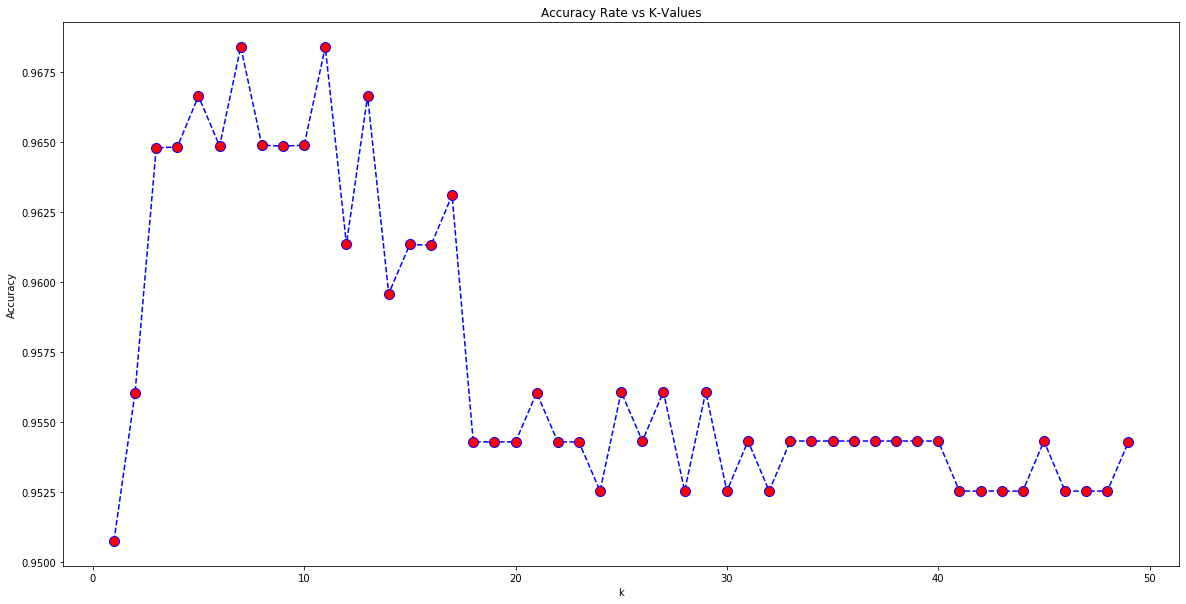

In [120]:
plt.figure(figsize=(20,10))
plt.plot(range(1,50),scores_1,color='blue',linestyle='dashed',marker='o' ,markerfacecolor='red',markersize=10)

plt.title('Accuracy Rate vs K-Values')
plt.xlabel('k')
plt.ylabel('Accuracy')